In [1]:
using TaylorIntegration, LaTeXStrings
using TaylorSeries
using BenchmarkTools
#using Plots
using Plots
#pyplot()
#gr()
gr(format="png")
#glvisualize()

Plots.GRBackend()

In [2]:
function Change(v)
    l = length(v[:,1])
    #println(l)
    rho, theta, z, prho, pphi,pz = zeros(l), zeros(l),zeros(l),zeros(l),zeros(l),zeros(l)
    i =1
    while i <= l
        #println(v[i,:])
        rho[i] = sqrt(v[i,:][1]^2 + v[i,:][2]^2)
        theta[i] = atan(v[i,:][2]/v[i,:][1])
        z[i] = v[i,:][3]
        prho[i] = (v[i,:][1]*v[i,:][4]+v[i,:][2]*v[i,:][5])/rho[i]
        pphi[i] =v[i,:][1]*v[i,:][5]-v[i,:][2]*v[i,:][4]
        pz[i] = v[i,:][6]
        #println(xvS[i,:])
        i +=1
    end
    
    return rho, theta, z, prho, pphi,pz
end

Change (generic function with 1 method)

In [3]:
# Equations of motion
@taylorize function kepler!(t, q, dq)
    r_p3d2 = (q[1]^2 + q[2]^2 + q[3]^2)^1.5
    
    dq[1] = q[4]
    dq[2] = q[5]
    dq[3] = q[6]/(ϵ + 1)  
    dq[4] = -(q[1]*(ϵ + 1))/r_p3d2
    dq[5] = -(q[2]*(ϵ + 1))/r_p3d2
    dq[6] = -(q[3]*(ϵ + 1))/r_p3d2
    #dq[7] = zero(q[7])
    return nothing
end

In [4]:
##### Constants #####
const α  = 0.6
#const ϵ = 5.5
const l = 1.5
const order = 64
const t0 = 0.0
const t_max = 100000*(2π) # we are just taking a wild guess about the period ;)
const abs_tol = 1.0E-20
const steps = 5000000
const n = 5.1

5.1

In [5]:
ϵ = 0.5

0.5

In [6]:
 q0 = [(l)^2/(ϵ + 1), 0.0, 0.0, 0.0, (ϵ + 1)/(l) ,(ϵ + 1)*sqrt(ϵ + 1)*sqrt(α)/l]

6-element Array{Float64,1}:
 1.5               
 0.0               
 0.0               
 0.0               
 1.0               
 0.9486832980505137

In [7]:
g(t, x, dx) = x[3]

g (generic function with 1 method)

In [8]:
@time tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, 0.0, 1.0,64, 1e-25, maxsteps=steps);

  3.947880 seconds (7.13 M allocations: 941.176 MiB, 11.54% gc time)


In [9]:
xvS

0×6 view(::LinearAlgebra.Transpose{Float64,SubArray{Float64,2,Array{Float64,2},Tuple{Base.Slice{Base.OneTo{Int64}},UnitRange{Int64}},true}}, 1:0, :) with eltype Float64

In [10]:
Change(xvS)

(Float64[], Float64[], Float64[], Float64[], Float64[], Float64[])

In [11]:
function contador(x)
    j = 1
    for i in 1:1:length(x)
        if x[i] > 0
            j = j + 1 
        end
    
    end
    return j
end

contador (generic function with 1 method)

In [12]:
function filtro(x,y,z,px,py,pz)
    l = contador(pz) + 1
    #println(l)
    xn,yn,zn,pxn,pyn,pzn = zeros(l), zeros(l),zeros(l),zeros(l),zeros(l),zeros(l)
    
    j=1
    
    for i in 1:1:length(x)
        
        if pz[i] > 0
            #println(i," ",j)
            xn[j] = x[i]
            yn[j] = y[i]
            zn[j] = z[i]
            pxn[j] = px[i]
            pyn[j] = py[i]
            pzn[j] = pz[i]
            j = j + 1      
        end

    end
    return xn,yn,zn,pxn,pyn,pzn 
end

filtro (generic function with 1 method)

In [14]:
global ϵ = 0.5
q0 = [l^2/(ϵ + 1), 0.0, 0.0, 0.0, (ϵ  + 1)/l,(ϵ + 1)*sqrt(ϵ + 1)*sqrt(α)/l]
tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, 0.0, 10000000*(2π),32, 1e-25, maxsteps=steps)
r, theta, z, pr, pt, pz =  Change(xvS)
rn, thetan, zn, prn, ptn, pzn = filtro(r, theta, z, pr, pt, pz)
    

┌ Info: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/porras/.julia/dev/TaylorIntegration/src/rootfinding.jl:220


([1.47438, 5.08261, 3.39185, 1.47028, 1.52622, 1.66175, 5.91589, 2.80087, 1.51774, 1.56654  …  1.55889, 3.60325, 5.53515, 1.68394, 1.58638, 1.53119, 2.83953, 5.95229, 0.0, 0.0], [1.23828, 0.211634, -1.2602, 0.730219, -1.31067, 0.099222, -1.05018, 0.623612, -0.669799, 0.396825  …  0.920372, -0.306322, 1.21992, 0.0145998, 1.37748, -0.697822, 1.14386, -0.347146, 0.0, 0.0], [0.0, -2.77556e-17, 0.0, -6.93889e-18, 6.93889e-18, 0.0, 0.0, 0.0, 0.0, 0.0  …  5.55112e-17, 2.77556e-17, 0.0, 0.0, 0.0, 0.0, 6.93889e-18, -2.77556e-17, 0.0, 0.0], [0.543582, 0.281186, -0.49535, -0.392593, 0.117393, 0.628181, 0.146658, -0.565503, -0.342106, 0.141823  …  0.446056, 0.459362, -0.206296, -0.607425, -0.125609, 0.351492, 0.558929, -0.136752, 0.0, 0.0], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5  …  1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.0, 0.0], [0.675518, 0.190067, 0.255524, 0.817431, 0.937489, 0.542098, 0.17879, 0.311022, 0.851023, 0.931194  …  0.774216, 0.269083, 0.197462, 0.573284, 0.933749, 0.8

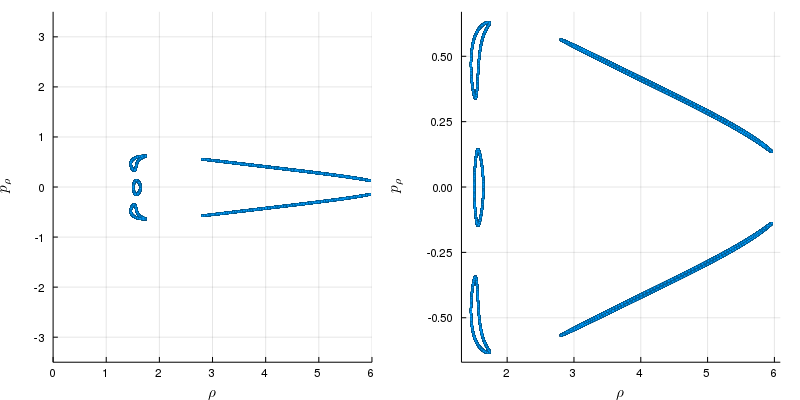

In [22]:
p11 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlims = (0,6), ylims = (-3.5,3.5),xlabel =L"\rho", ylabel =L"p_{\rho}")
p12 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlabel =L"\rho", ylabel =L"p_{\rho}")
plot(p11, p12, layout=(1,2),size=(800,400))

In [23]:
savefig("PS0-6_1-5_0-5_R.png")

In [24]:
global ϵ = 1.5
    q0 = [l^2/(ϵ + 1), 0.0, 0.0, 0.0, (ϵ  + 1)/l,(ϵ + 1)*sqrt(ϵ + 1)*sqrt(α)/l]
    tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, 0.0, 10000000*(2π),32, 1e-25, maxsteps=steps)
    r, theta, z, pr, pt, pz =  Change(xvS)
    rn, thetan, zn, prn, ptn, pzn = filtro(r, theta, z, pr, pt, pz)
    #p2 = scatter(rn, prn,  markersize=.1,leg=false)

┌ Info: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/porras/.julia/dev/TaylorIntegration/src/rootfinding.jl:220


([0.907044, 0.931499, 1.00985, 1.10548, 1.08125, 1.20961, 1.11329, 2.35966, 1.56964, 1.70455  …  3.93573, 1.22058, 1.30729, 0.679097, 3.36812, 1.14489, 1.32191, 0.833154, 0.0, 0.0], [-0.696057, -1.42905, 0.808224, -0.592795, 1.50447, 0.260817, -0.412233, -0.121116, -0.394108, 1.41132  …  -1.07188, -0.305223, -1.44733, 0.360028, 1.39874, -1.50436, 0.570548, -0.76395, 0.0, 0.0], [0.0, -3.46945e-18, 0.0, 0.0, -6.93889e-18, 0.0, -6.93889e-17, 0.0, 1.38778e-17, 1.38778e-17  …  0.0, 0.0, 3.46945e-18, 0.0, 3.46945e-18, -3.46945e-18, -6.93889e-18, 0.0, 0.0, 0.0], [-0.0839918, -0.210885, -0.423301, 0.283589, -0.087484, -0.350483, 1.16219, -0.713128, -0.515763, 0.247385  …  0.00508028, -0.698313, 0.494358, 0.877159, -0.341284, -0.860189, 0.398593, 0.613629, 0.0, 0.0], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5  …  1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.0, 0.0], [2.03681, 2.01185, 1.90697, 1.9302, 1.98806, 1.84515, 0.731483, 0.487831, 1.4959, 1.57053  …  0.187219, 1.57115, 1.69754, 1.22

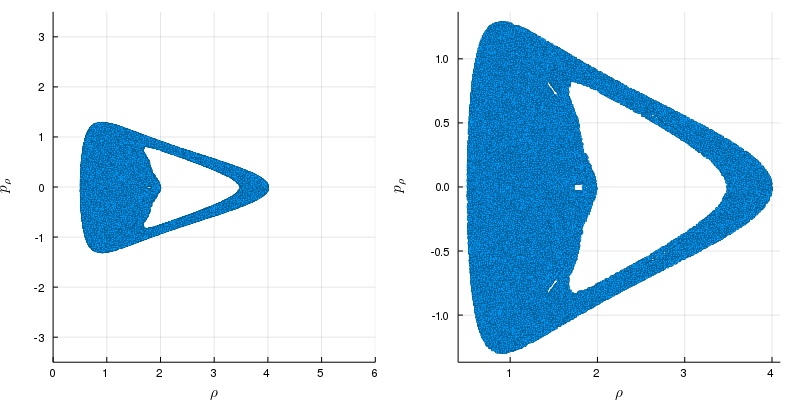

In [25]:
p21 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlims = (0,6), ylims = (-3.5,3.5), xlabel =L"\rho", ylabel =L"p_{\rho}")
p22 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlabel =L"\rho", ylabel =L"p_{\rho}")
plot(p21, p22, layout=(1,2),size=(800,400))

In [26]:
savefig("PS0-6_1-5_1-5_R.png")

In [27]:
global ϵ = 1.9
    q0 = [l^2/(ϵ + 1), 0.0, 0.0, 0.0, (ϵ  + 1)/l,(ϵ + 1)*sqrt(ϵ + 1)*sqrt(α)/l]
    tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, 0.0, 10000000*(2π),32, 1e-25, maxsteps=steps)
    r, theta, z, pr, pt, pz =  Change(xvS)
    rn, thetan, zn, prn, ptn, pzn = filtro(r, theta, z, pr, pt, pz)
    #p3 = scatter(rn, prn,  markersize=.1,leg=false)

┌ Info: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/porras/.julia/dev/TaylorIntegration/src/rootfinding.jl:220


([0.76801, 0.79997, 0.886641, 0.946377, 0.893106, 0.804302, 0.768093, 0.775793, 0.768169, 0.795884  …  0.786602, 0.863142, 0.941774, 0.914373, 0.821675, 0.770694, 0.77448, 0.770129, 0.0, 0.0], [0.0805966, 0.128492, 0.0825244, 0.00739844, -0.0685879, -0.118772, -0.0769522, 0.00402389, 0.084147, 0.1377  …  0.361826, 0.334349, 0.262561, 0.184095, 0.122635, 0.140663, 0.221357, 0.299793, 0.0, 0.0], [6.93889e-18, 0.0, 0.0, 0.0, 0.0, 3.46945e-18, 1.38778e-17, 0.0, 1.38778e-17, 3.46945e-18  …  0.0, 0.0, 0.0, 0.0, -6.93889e-18, -1.38778e-16, 0.0, 0.0, 0.0, 0.0], [0.353083, 0.479253, 0.322745, 0.0111853, -0.304634, -0.477328, -0.370635, -0.0263281, 0.334356, 0.479857  …  0.475531, 0.381417, 0.0902592, -0.235942, -0.459727, -0.422589, -0.118616, 0.259793, 0.0, 0.0], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5  …  1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.0, 0.0], [2.47812, 2.41409, 2.4561, 2.48022, 2.45923, 2.41442, 2.47068, 2.54985, 2.48565, 2.41436  …  2.41784, 2.44357, 2.47865, 2.46851, 

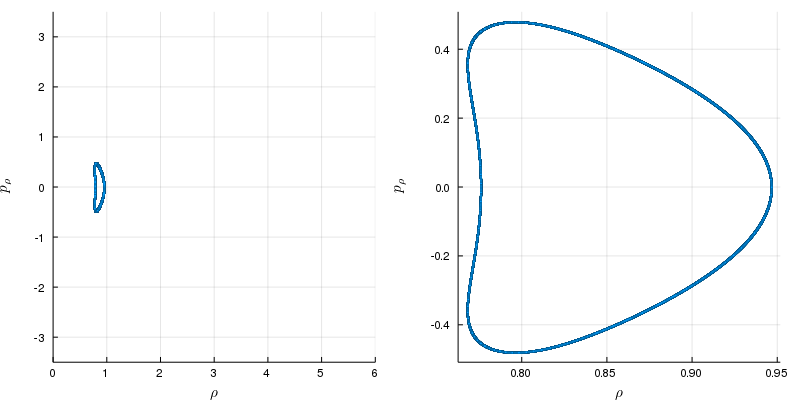

In [28]:
p31 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false, xlims = (0,6), ylims = (-3.5,3.5),xlabel =L"\rho", ylabel =L"p_{\rho}")
p32 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlabel =L"\rho", ylabel =L"p_{\rho}")
plot(p31, p32, layout=(1,2),size=(800,400))

In [29]:
savefig("PS0-6_1-5_1-9_R.png")

In [30]:
global ϵ = 4.0
    q0 = [l^2/(ϵ + 1), 0.0, 0.0, 0.0, (ϵ  + 1)/l,(ϵ + 1)*sqrt(ϵ + 1)*sqrt(α)/l]
    tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, 0.0, 10000000*(2π),32, 1e-25, maxsteps=steps)
    r, theta, z, pr, pt, pz =  Change(xvS)
    rn, thetan, zn, prn, ptn, pzn = filtro(r, theta, z, pr, pt, pz)
    #p4 = scatter(rn, prn,  markersize=.1,leg=false)

┌ Info: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/porras/.julia/dev/TaylorIntegration/src/rootfinding.jl:220


([1.06235, 1.00437, 0.510427, 0.79201, 0.730084, 0.420036, 0.839929, 0.7241, 0.59384, 0.49602  …  1.16232, 0.469263, 0.850954, 0.812757, 0.377136, 0.334966, 0.322057, 0.835527, 0.0, 0.0], [-0.405147, -1.03313, 1.51597, 0.0540816, 0.573893, 0.857542, 0.406935, -0.767647, 1.47442, 0.507024  …  -0.353706, 0.94828, 0.633904, 1.00062, -0.736528, 0.410197, -0.287244, -0.496487, 0.0, 0.0], [6.93889e-18, 0.0, 1.85615e-16, 5.42101e-20, 5.20417e-18, 1.73472e-16, -1.45717e-16, 1.73472e-18, 3.46945e-18, 6.93889e-18  …  0.0, -7.28584e-17, 2.08167e-17, 0.0, 4.33681e-19, -1.9082e-17, 1.3314e-16, -6.93889e-18, 0.0, 0.0], [-0.311489, 0.500217, -0.897182, -2.11194, 1.60051, -0.574778, 0.813572, -1.04737, -0.271648, 2.05766  …  1.52647, 1.25255, -1.1674, 2.04661, 1.8712, 0.206292, -0.368064, -1.46878, 0.0, 0.0], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5  …  1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.0, 0.0], [3.7934, 3.89316, 5.34135, 0.819872, 3.51409, 5.60346, 4.24859, 4.45957, 5.45022, 3.41838 

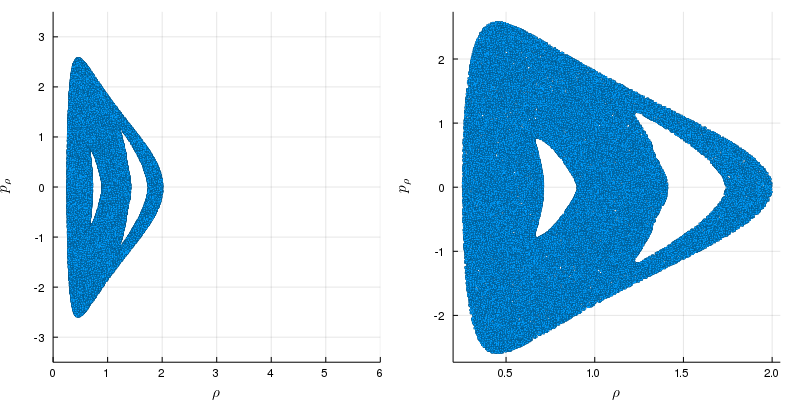

In [31]:
p41 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false, xlims = (0,6), ylims = (-3.5,3.5),xlabel =L"\rho", ylabel =L"p_{\rho}")
p42 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlabel =L"\rho", ylabel =L"p_{\rho}")
plot(p41, p42, layout=(1,2),size=(800,400))

In [32]:
savefig("PS0-6_1-5_4-0_R.png")

In [33]:
global ϵ = 5.1
    q0 = [l^2/(ϵ + 1), 0.0, 0.0, 0.0, (ϵ  + 1)/l,(ϵ + 1)*sqrt(ϵ + 1)*sqrt(α)/l]
    tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, 0.0, 10000000*(2π),32, 1e-25, maxsteps=steps)
    r, theta, z, pr, pt, pz =  Change(xvS)
    rn, thetan, zn, prn, ptn, pzn = filtro(r, theta, z, pr, pt, pz)
    #p5 = scatter(rn, prn,  markersize=.1,leg=false)

┌ Info: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/porras/.julia/dev/TaylorIntegration/src/rootfinding.jl:220


([0.372718, 0.392593, 0.386526, 0.366985, 0.363755, 0.36625, 0.383496, 0.398075, 0.378462, 0.372624  …  0.292909, 0.283323, 0.998471, 0.873139, 0.487937, 0.38399, 0.41388, 0.325103, 0.0, 0.0], [-1.53016, -0.108399, 1.08762, -0.581098, 1.08058, -0.39085, 1.10832, -0.817542, 0.539671, -1.04491  …  -0.308027, -1.11184, -1.16747, -1.5396, 1.40001, 0.723969, -0.974823, 0.192806, 0.0, 0.0], [-1.59595e-16, 1.9082e-16, 0.0, -7.28584e-17, 4.22839e-17, 3.46945e-18, -4.33681e-19, 0.0, 1.73472e-18, 1.73472e-18  …  4.33681e-19, -1.04083e-17, 6.93889e-18, 2.08167e-17, 0.0, 0.0, -3.46945e-17, 6.93889e-18, 0.0, 0.0], [-0.305012, -0.359531, 0.455836, 0.329239, 0.0162154, -0.30242, -0.465011, 0.218223, 0.306674, 0.0387018  …  1.95978, -1.71028, -0.218443, 0.795989, -1.64633, 2.69287, 0.503636, 1.0723, 0.0, 0.0], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5  …  1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.0, 0.0], [7.74273, 7.70525, 7.68439, 7.73721, 7.77862, 7.74373, 7.68519, 7.7262, 7.73883, 7.77874 

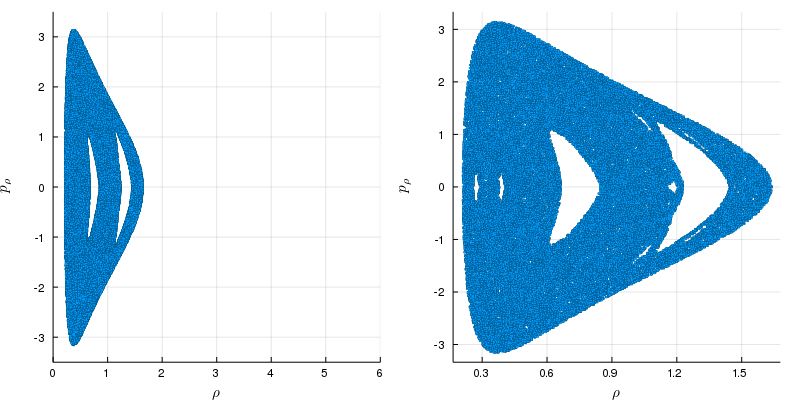

In [35]:
p51 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlims = (0,6),ylims = (-3.5,3.5),xlabel =L"\rho", ylabel =L"p_{\rho}")
p52 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlabel =L"\rho", ylabel =L"p_{\rho}")
plot(p51, p52, layout=(1,2),size=(800,400))


In [36]:
savefig("PS0-6_1-5_5-1_R.png")

In [37]:
global ϵ = 0.0
    q0 = [l^2/(ϵ + 1), 0.0, 0.0, 0.0, (ϵ  + 1)/l,(ϵ + 1)*sqrt(ϵ + 1)*sqrt(α)/l]
    tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, 0.0, 10000000*(2π),32, 1e-25, maxsteps=steps)
    r, theta, z, pr, pt, pz =  Change(xvS)
    rn, thetan, zn, prn, ptn, pzn = filtro(r, theta, z, pr, pt, pz)
    #p0 = scatter(rn, prn,  markersize=.1,leg=false)

┌ Info: Maximum number of integration steps reached; exiting.
└ @ TaylorIntegration /Users/porras/.julia/dev/TaylorIntegration/src/rootfinding.jl:220


([2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25  …  2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 0.0, 0.0], [-8.48087e-17, -2.8064e-16, -2.96059e-16, -6.16791e-18, -4.07082e-16, -2.46716e-16, 1.85037e-16, 1.72701e-16, 3.70074e-16, 5.79783e-16  …  1.17437e-14, 1.17437e-14, 1.17437e-14, 1.17437e-14, 1.17437e-14, 1.17437e-14, 1.17437e-14, 1.17437e-14, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.38778e-17, 2.77556e-17, 0.0, -5.55112e-17, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.22751e-16, 9.04626e-17, 2.43247e-16, 5.37122e-16, 6.23729e-16, 7.02884e-16, 1.05317e-15, 8.50657e-16, 4.82639e-16, 2.755e-16  …  -1.61924e-13, -1.61924e-13, -1.61924e-13, -1.61924e-13, -1.61924e-13, -1.61924e-13, -1.61924e-13, -1.61924e-13, 0.0, 0.0], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5  …  1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.0, 0.0], [0.516398, 0.516398, 0.516398, 0.516398, 0.516398, 0.516398, 0.516398, 0.516398, 0.516398, 0.516398  …  0.516398, 0.516398, 0.516398

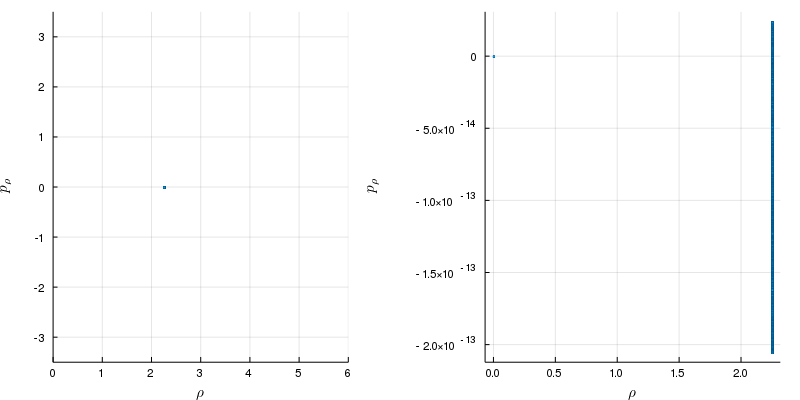

In [39]:
p01 = scatter(rn[1:end-2], prn[1:end-2],  markersize=.1,leg=false,xlims = (0,6),ylims = (-3.5,3.5),xlabel =L"\rho", ylabel =L"p_{\rho}")
p02 = scatter(rn, prn,  markersize=.1,leg=false,xlabel =L"\rho", ylabel =L"p_{\rho}")
plot(p01, p02, layout=(1,2),size=(800,400))

In [40]:
savefig("PS0-6_1-5_0-0_R.png")

In [ ]:
plot(p0,p1,p2,p3,p4,p5)

In [ ]:
r, theta, z, pr, pt, pz =  Change(xvS)

In [ ]:
rn, thetan, zn, prn, ptn, pzn = filtro(r, theta, z, pr, pt, pz)

In [ ]:
scatter(rn, prn,  markersize=.1,leg=false)

In [ ]:
p1 = plot(sin, 0:0.01:2*pi)
p2 = plot(0:0.01:2*pi, sin)

x = Array(0:0.01:2*pi);
y = sin.(x); # elementwise sin(x)

p3 = plot(x,y)
p4 = plot(y,x)


plot(p1,p2,p3,p4)


In [ ]:
scatter(zn, pzn,  markersize=.1,leg=false,c="red")
xlims!(-0.4,0.4)
xlabel!(L"z")
ylabel!(L"p_z")

In [ ]:
savefig("PS05_11_105_Z.png")

In [ ]:
scatter(thetan, ptn,  markersize=.1,leg=false, c="magenta")
ylims!((10,11))
xlabel!(L"\theta")
ylabel!(L"p_{\theta}")

In [ ]:
savefig("PS05_11_105_T.png")

In [ ]:
rn = rn[1:end-1]
prn = prn[1:end-1]

In [ ]:
scatter(rn, prn,  markersize=.1,leg=false)
#xlims!((0,5))
xlabel!(L"r")
ylabel!(L"p_{r}")

In [ ]:
savefig("PS05_11_105_R.png")

In [ ]:

for i in 1:1:Int(length(xvS)/6)
    if xvS[i,6] > 0
        
        println(xvS[i,6])
    end
end

In [ ]:
scatter!()

In [ ]:
# px: select px0>0 such that E=E0
println(q0," ", H(q0))
px(x, E) = sqrt(ϵ + 1)*sqrt(2(E - V(x[1], x[2], x[3])) - (x[4]^2 + x[5]^2))

# px!: in-place version of px; returns the initial condition
function px!(x, E)
    mypx = px(x, E)
    x[6] = mypx
    return x
end

# run px!
px!(q0, E0)

In [ ]:
H(q0)

In [ ]:
 tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, x_ini, 0.0, 1350.0,32, 1e-25, maxsteps=30000);

In [ ]:
# number of initial conditions
nconds = 100
tvSv = Vector{Vector{Float64}}(undef, nconds)
xvSv = Vector{Matrix{Float64}}(undef, nconds)
gvSv = Vector{Vector{Float64}}(undef, nconds)
x_ini = similar(q0)

In [ ]:
tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, x_ini, 0.0, 1350.0,32, 1e-25, maxsteps=30000);

In [ ]:
for i in 1:nconds
    rand1 = rand()
    rand2 = rand()
    x_ini .= q0 .+ 0.005 .* [0.0, sqrt(rand1)*cos(2pi*rand2), 0.0, sqrt(rand1)*sin(2pi*rand2),sqrt(rand1)*sin(2pi*rand2), sqrt(rand1)*sin(2pi*rand2)]
    px!(x_ini, E0)

    tv_i, xv_i, tvS_i, xvS_i, gvS_i = taylorinteg(kepler!, g, x_ini, 0.0, 1350.0,
        25, 1e-25, maxsteps=30000);
    tvSv[i] = vcat(0.0, tvS_i)
    xvSv[i] = vcat(transpose(x_ini), xvS_i)
    gvSv[i] = vcat(0.0, gvS_i)
end

In [ ]:
xvSv[1,2]

In [ ]:
using Plots
poincare_anim1 = @animate for i=1:21
    scatter(map(x->x[i,2], xvSv), map(x->x[i,4], xvSv), label="$(i-1)-th iterate",
        m=(1,stroke(0)), ratio=:equal)
    #xlims!(0.08, 0.48)
    #ylims!(-0.13, 0.13)
    xlabel!("y")
    ylabel!("py")
    title!("Hénon-Heiles Poincaré map (21 iterates)")
end
gif(poincare_anim1, "poincareanim1.gif", fps = 2);
nothing # hide

In [ ]:
savefig("PS_0.png")

In [ ]:
x = rand(10)
p1 = plot(x, title="Default looks")
p2 = plot(x, grid=(:y, :olivedrab, :dot, 1, 0.9), title="Modified y grid")
p3 = plot(deepcopy(p2), title="Add x grid")
xgrid!(p3, :on, :cadetblue, 2, :dashdot, 0.4)
plot(p1, p2, p3, p1,layout=(2, 2), label="", fillrange=0, fillalpha=0.3)

In [ ]:
function energia(x_, y_, z_, u_, v_, w_)
    E = H.(x_, y_, z_, u_, v_, w_)
    E0=E[1]
end

In [ ]:
E0=E[1]

In [ ]:
plot(tv/(2π), E)
ylims!((-1,0))

In [ ]:
δE = (E.-E0)/E0

In [ ]:
function energyRelative(x_, y_, z_, u_, v_, w_)
    E = H.(x_, y_, z_, u_, v_, w_)
    E0=E[1]
    return (E.-E0)/E0
end

In [ ]:
1.7763568394002505e-15/E0

In [ ]:
eps(Float64)

In [ ]:
plot(

tv/(2π), δE/eps(Float64),
title = L"\mathrm{Energy\;\; relative\;\; error\;\; vs\;\; time}", 
xaxis = (L"t\mathrm{\,(orbital\;\;periods)}"),
yaxis = (L"\delta E \mathrm{\;\;(machine\;\;epsilons)}"),
label = L"\mathrm{Energy\;\; relative\;\; error\;\; vs\;\; time}"

)

In [ ]:
#global ϵ = 0.1
while ϵ < n
#for i = 1:4
    #ϵ = i
    #global ϵ
    println(ϵ)
    tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, t0, t_max, order, abs_tol, maxsteps=steps)
    pxS, pyS, pzS, puS, pvS, pwS = view(xvS,:,1), view(xvS,:,2), view(xvS,:,3), view(xvS,:,4), view(xvS,:,5), view(xvS,:,6)
    px, py, pz, pu, pv, pw = view(xv,:,1), view(xv,:,2), view(xv,:,3), view(xv,:,4), view(xv,:,5), view(xv,:,6)
    
    scatter(px, pu, markersize = 0.5,lab = "Seccion de Poincare $ϵ")
    savefig("Smy_plotpz$ϵ.pdf")
    
    δE = energyRelative(px, py, pz, pu, pv, pw)
    
    plot(

    tv/(2π), δE/eps(Float64),
    title = L"\mathrm{Energy\;\; relative\;\; error\;\; vs\;\; time}", 
    xaxis = (L"t\mathrm{\,(orbital\;\;periods)}"),
    yaxis = (L"\delta E \mathrm{\;\;(machine\;\;epsilons)}"),
    label = L"\mathrm{Energy\;\; relative\;\; error\;\; vs\;\; time}"
    )
    savefig("Energy$ϵ.pdf")
    
    global ϵ = ϵ + 0.03
end

In [ ]:
#tv, xv, tvS, xvS, gvS = taylorinteg(kepler!, g, q0, t0, t_max, order, abs_tol, maxsteps=steps)
#px, py, pz, pu, pv, pw = view(xvS,:,1), view(xvS,:,2), view(xvS,:,3), view(xvS,:,4), view(xvS,:,5), view(xvS,:,6)
#scatter(px, pu, markersize = 0.5,lab = "Seccion de Poincare Luis")
#savefig("Smy_plotpz.pdf")


In [ ]:
import LinearAlgebra: tr

In [ ]:
xi = set_variables("δ", order=1, numvars=length(q0))
x0TN = q0 .+ xi
dx0TN = similar(x0TN)
kepler!(t0, x0TN, dx0TN)
jjac = TaylorSeries.jacobian(dx0TN)
lorenztr = tr(jjac) #trace of Lorenz system Jacobian matrix

In [ ]:
jjac

In [ ]:
TaylorSeries.jacobian(dx0TN) == jjac 

In [ ]:
global ϵ = 0.0

In [ ]:
while ϵ < n
    tv, xv, λv = lyap_taylorinteg(kepler!, q0, t0, 150*(2π), 28, 1e-20; maxsteps=2000000);
    println("Pasa")
    plot(tv, λv[:,1], label="L_1", legend=:right)
    plot!(tv, λv[:,2], label="L_2", legend=:right)
    plot!(tv, λv[:,3], label="L_3", legend=:right)
    plot!(tv, λv[:,4], label="L_4", legend=:right)
    plot!(tv, λv[:,5], label="L_5", legend=:right)
    plot!(tv, λv[:,6], label="L_6", legend=:right)
    ylims!((-20,20))
    xlabel!("time")
    ylabel!("L_i, i=1,2,3")
    title!("Lyapunov exponents vs time $ϵ")
    savefig("Lyapunov$ϵ.pdf")
    global ϵ = ϵ + 0.1
end

In [ ]:
 lorenztr

In [ ]:
sum(λv[end,:])

In [ ]:
#plot(tv, λv[:,1], label="L_1", legend=:right)
#plot!(tv, λv[:,2], label="L_2", legend=:right)
#plot!(tv, λv[:,3], label="L_3", legend=:right)
#plot!(tv, λv[:,4], label="L_4", legend=:right)
#plot!(tv, λv[:,5], label="L_5", legend=:right)
#plot!(tv, λv[:,6], label="L_6", legend=:right)
#ylims!((-0.1,0.1))
#xlabel!("time")
#ylabel!("L_i, i=1,2,3")
#title!("Lyapunov exponents vs time")